# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [14]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


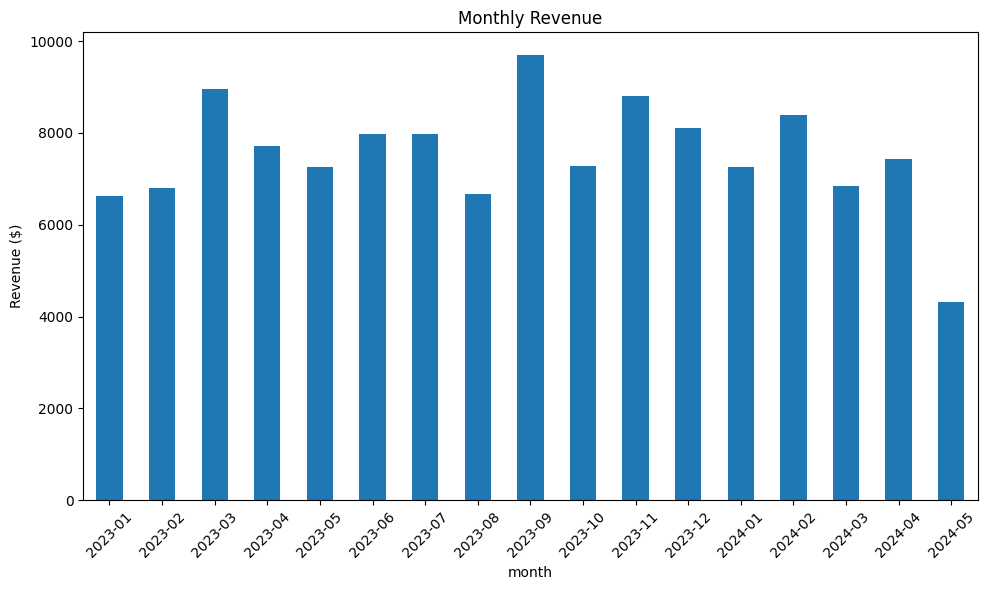

In [15]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

Total Revenue Last Quarter: $128,140.67

Monthly Revenue Breakdown:
2023-01: $6,626.66
2023-02: $6,796.03
2023-03: $8,960.10
2023-04: $7,713.47
2023-05: $7,266.80
2023-06: $7,982.47
2023-07: $7,981.65
2023-08: $6,664.64
2023-09: $9,708.06
2023-10: $7,287.27
2023-11: $8,795.85
2023-12: $8,119.44
2024-01: $7,268.59
2024-02: $8,388.91
2024-03: $6,835.73
2024-04: $7,430.29
2024-05: $4,314.71


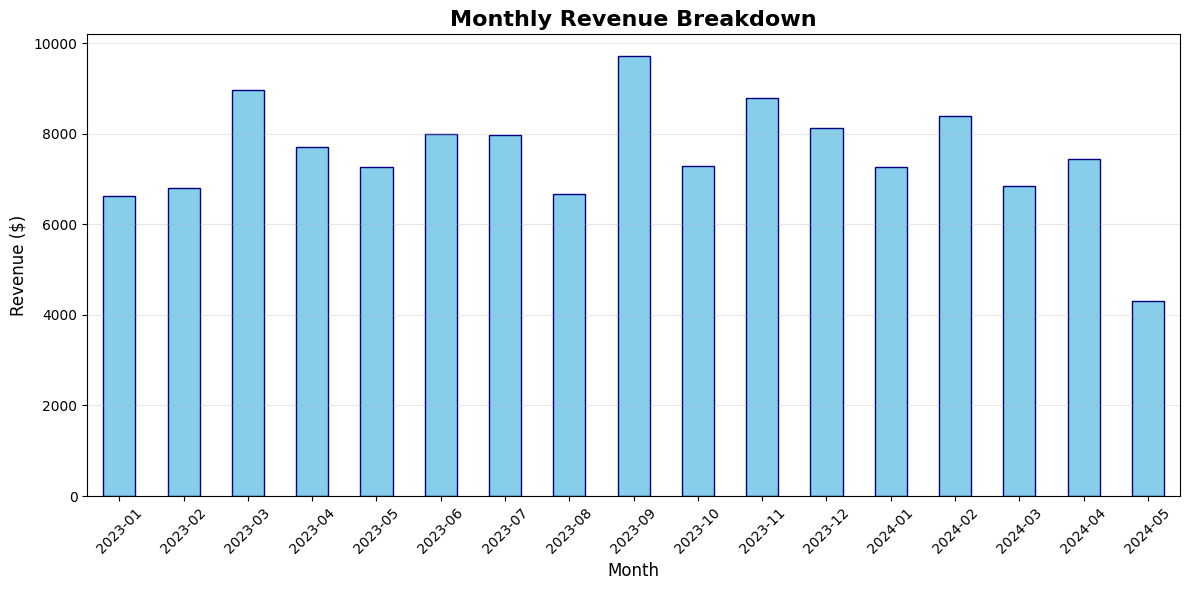


Highest Revenue Month: 2023-09 ($9,708.06)
Lowest Revenue Month: 2024-05 ($4,314.71)
Average Monthly Revenue: $7,537.69


In [16]:
# Calculate total revenue for the quarter
total_revenue = data['revenue'].sum()
print(f"Total Revenue Last Quarter: ${total_revenue:,.2f}")

# Revenue breakdown by month
monthly_revenue = data.groupby('month')['revenue'].sum()
print("\nMonthly Revenue Breakdown:")
for month, revenue in monthly_revenue.items():
    print(f"{month}: ${revenue:,.2f}")

# Create visualization
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='bar', color='skyblue', edgecolor='navy')
plt.title('Monthly Revenue Breakdown', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Additional insights
print(f"\nHighest Revenue Month: {monthly_revenue.idxmax()} (${monthly_revenue.max():,.2f})")
print(f"Lowest Revenue Month: {monthly_revenue.idxmin()} (${monthly_revenue.min():,.2f})")
print(f"Average Monthly Revenue: ${monthly_revenue.mean():,.2f}")

### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

Top 5 Customers by Revenue Contribution:
1. Customer ID 62: $4,448.39
2. Customer ID 24: $3,369.44
3. Customer ID 90: $2,976.78
4. Customer ID 92: $2,838.74
5. Customer ID 97: $2,835.62


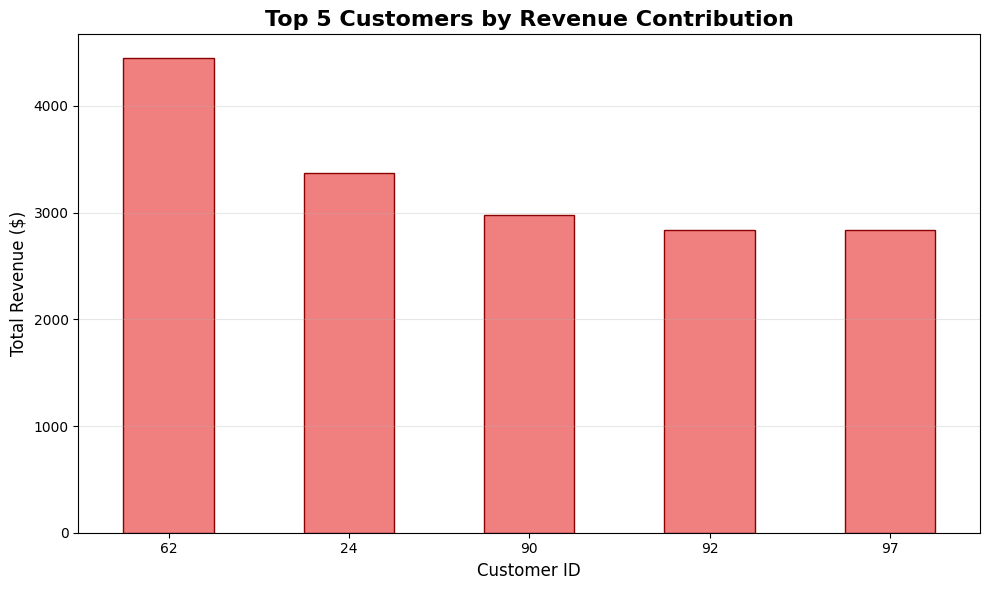


Top 5 customers contribute $16,468.97 (12.9%) of total revenue


In [17]:
# Find top 5 customers by total revenue
top_customers = data.groupby('customer_id')['revenue'].sum().sort_values(ascending=False).head(5)

print("Top 5 Customers by Revenue Contribution:")
print("=" * 50)
for i, (customer_id, revenue) in enumerate(top_customers.items(), 1):
    print(f"{i}. Customer ID {customer_id}: ${revenue:,.2f}")

# Create visualization
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='lightcoral', edgecolor='darkred')
plt.title('Top 5 Customers by Revenue Contribution', fontsize=16, fontweight='bold')
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Additional analysis
total_top5_revenue = top_customers.sum()
total_revenue = data['revenue'].sum()
percentage = (total_top5_revenue / total_revenue) * 100
print(f"\nTop 5 customers contribute ${total_top5_revenue:,.2f} ({percentage:.1f}%) of total revenue")

### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

Customer Segment Analysis:
                  Avg_Revenue_Per_Order  Total_Revenue  Number_of_Orders
customer_segment                                                        
Professional                     255.65       47807.05               187
Senior                           262.13       28048.33               107
Student                          253.81       52285.29               206

Highest Average Spending per Order:
Segment: Senior
Average Revenue per Order: $262.13


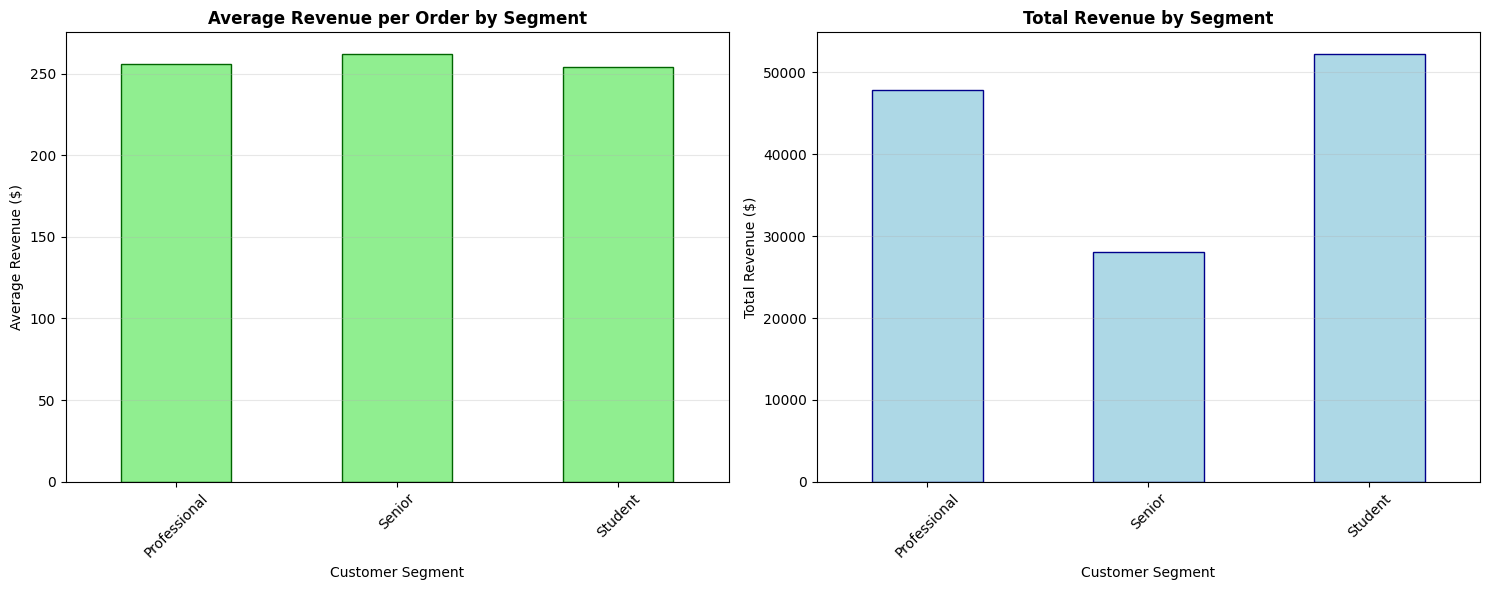


Segment Distribution:
Professional: 187 orders (37.4% of total orders)
Senior: 107 orders (21.4% of total orders)
Student: 206 orders (41.2% of total orders)


In [18]:
# Analyze spending by customer segment
segment_analysis = data.groupby('customer_segment')['revenue'].agg(['mean', 'sum', 'count']).round(2)
segment_analysis.columns = ['Avg_Revenue_Per_Order', 'Total_Revenue', 'Number_of_Orders']

print("Customer Segment Analysis:")
print("=" * 60)
print(segment_analysis)

# Find the segment with highest average spending
highest_avg_segment = segment_analysis['Avg_Revenue_Per_Order'].idxmax()
highest_avg_value = segment_analysis['Avg_Revenue_Per_Order'].max()

print(f"\nHighest Average Spending per Order:")
print(f"Segment: {highest_avg_segment}")
print(f"Average Revenue per Order: ${highest_avg_value:.2f}")

# Create visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Average revenue per order by segment
segment_analysis['Avg_Revenue_Per_Order'].plot(kind='bar', ax=ax1, color='lightgreen', edgecolor='darkgreen')
ax1.set_title('Average Revenue per Order by Segment', fontweight='bold')
ax1.set_xlabel('Customer Segment')
ax1.set_ylabel('Average Revenue ($)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Total revenue by segment
segment_analysis['Total_Revenue'].plot(kind='bar', ax=ax2, color='lightblue', edgecolor='darkblue')
ax2.set_title('Total Revenue by Segment', fontweight='bold')
ax2.set_xlabel('Customer Segment')
ax2.set_ylabel('Total Revenue ($)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Additional insights
print(f"\nSegment Distribution:")
for segment in segment_analysis.index:
    orders = segment_analysis.loc[segment, 'Number_of_Orders']
    percentage = (orders / len(data)) * 100
    print(f"{segment}: {orders} orders ({percentage:.1f}% of total orders)")

### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

Regional Analysis:
        Total_Revenue  Avg_Order_Size  Number_of_Orders
region                                                 
East         31221.80          240.17               130
North        34351.69          258.28               133
South        34839.45          274.33               127
West         27727.73          252.07               110

Highest Revenue Region: South ($34,839.45)
Highest Average Order Size Region: South ($274.33)


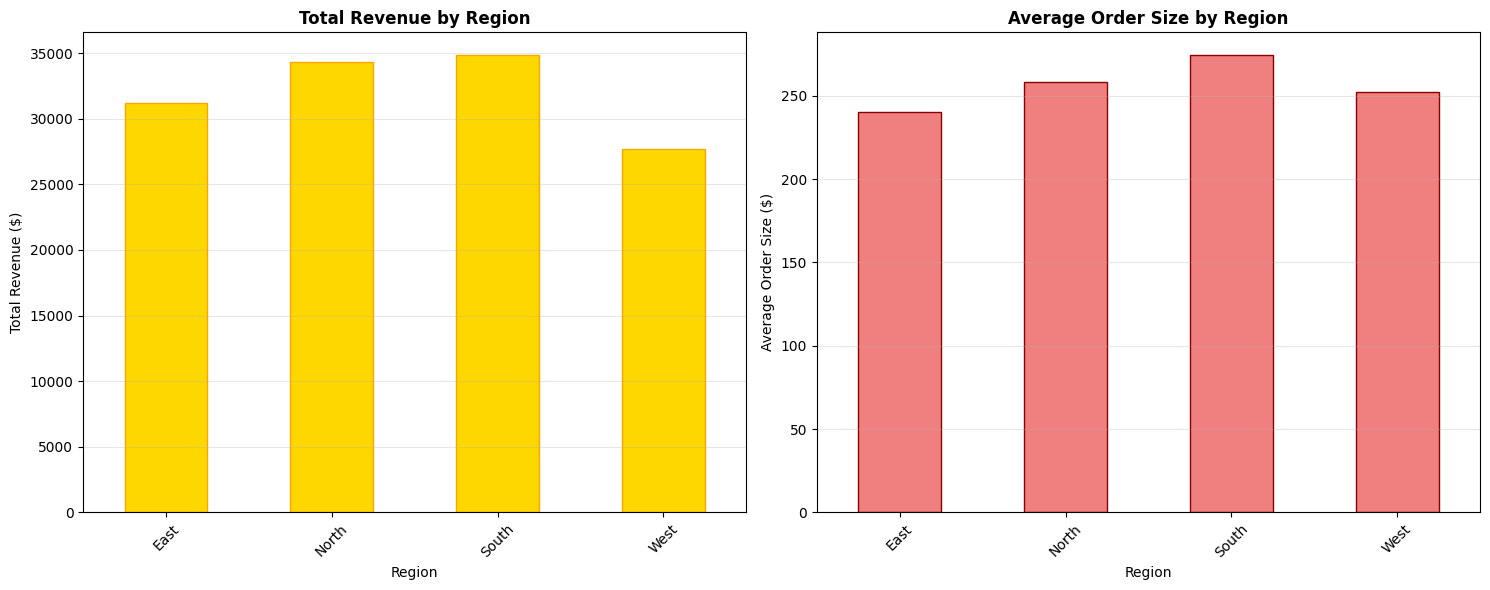


Regional Distribution:
East: 130 orders (26.0% of total orders)
North: 133 orders (26.6% of total orders)
South: 127 orders (25.4% of total orders)
West: 110 orders (22.0% of total orders)


In [19]:
# Analyze regional trends
regional_analysis = data.groupby('region')['revenue'].agg(['sum', 'mean', 'count']).round(2)
regional_analysis.columns = ['Total_Revenue', 'Avg_Order_Size', 'Number_of_Orders']

print("Regional Analysis:")
print("=" * 50)
print(regional_analysis)

# Find highest revenue region
highest_revenue_region = regional_analysis['Total_Revenue'].idxmax()
highest_revenue_value = regional_analysis['Total_Revenue'].max()

# Find highest average order size region
highest_avg_region = regional_analysis['Avg_Order_Size'].idxmax()
highest_avg_value = regional_analysis['Avg_Order_Size'].max()

print(f"\nHighest Revenue Region: {highest_revenue_region} (${highest_revenue_value:,.2f})")
print(f"Highest Average Order Size Region: {highest_avg_region} (${highest_avg_value:.2f})")

# Create visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Total revenue by region
regional_analysis['Total_Revenue'].plot(kind='bar', ax=ax1, color='gold', edgecolor='orange')
ax1.set_title('Total Revenue by Region', fontweight='bold')
ax1.set_xlabel('Region')
ax1.set_ylabel('Total Revenue ($)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Average order size by region
regional_analysis['Avg_Order_Size'].plot(kind='bar', ax=ax2, color='lightcoral', edgecolor='darkred')
ax2.set_title('Average Order Size by Region', fontweight='bold')
ax2.set_xlabel('Region')
ax2.set_ylabel('Average Order Size ($)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Additional insights
print(f"\nRegional Distribution:")
for region in regional_analysis.index:
    orders = regional_analysis.loc[region, 'Number_of_Orders']
    percentage = (orders / len(data)) * 100
    print(f"{region}: {orders} orders ({percentage:.1f}% of total orders)")

### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

Product Category Performance:
                  Total_Quantity  Total_Revenue  Number_of_Orders
product_category                                                 
Books                        227       24046.06                93
Clothing                     253       24804.57               104
Electronics                  239       25498.31                99
Home                         269       29871.47               102
Sports                       246       23920.26               102

Most Popular by Quantity: Home (269 units)
Most Popular by Revenue: Home ($29,871.47)


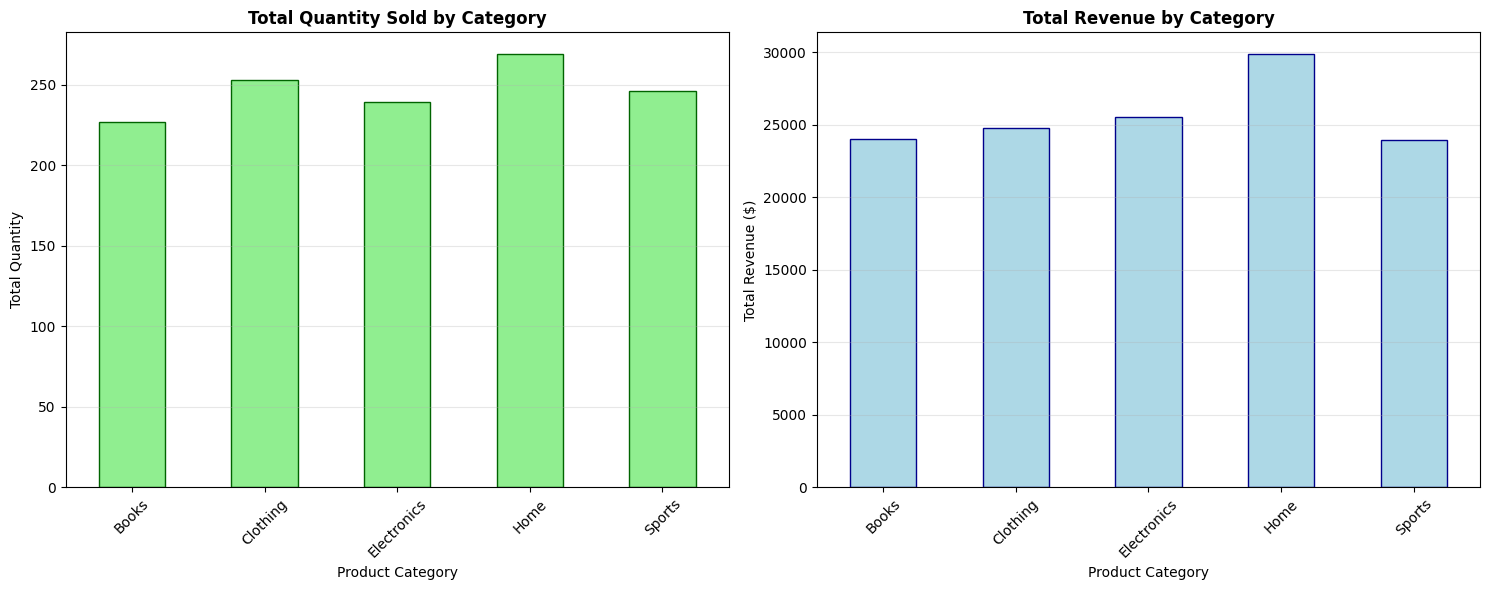


Average Price per Unit by Category:
Books: $105.93
Clothing: $98.04
Electronics: $106.69
Home: $111.05
Sports: $97.24


In [20]:
# Analyze product category performance
product_analysis = data.groupby('product_category').agg({
    'quantity': 'sum',
    'revenue': 'sum',
    'order_id': 'count'
}).round(2)
product_analysis.columns = ['Total_Quantity', 'Total_Revenue', 'Number_of_Orders']

# Sort by quantity and revenue
most_popular_by_quantity = product_analysis['Total_Quantity'].idxmax()
most_popular_by_revenue = product_analysis['Total_Revenue'].idxmax()

print("Product Category Performance:")
print("=" * 60)
print(product_analysis)

print(f"\nMost Popular by Quantity: {most_popular_by_quantity} ({product_analysis.loc[most_popular_by_quantity, 'Total_Quantity']} units)")
print(f"Most Popular by Revenue: {most_popular_by_revenue} (${product_analysis.loc[most_popular_by_revenue, 'Total_Revenue']:,.2f})")

# Create visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Total quantity by category
product_analysis['Total_Quantity'].plot(kind='bar', ax=ax1, color='lightgreen', edgecolor='darkgreen')
ax1.set_title('Total Quantity Sold by Category', fontweight='bold')
ax1.set_xlabel('Product Category')
ax1.set_ylabel('Total Quantity')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Total revenue by category
product_analysis['Total_Revenue'].plot(kind='bar', ax=ax2, color='lightblue', edgecolor='darkblue')
ax2.set_title('Total Revenue by Category', fontweight='bold')
ax2.set_xlabel('Product Category')
ax2.set_ylabel('Total Revenue ($)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate average price per unit for each category
product_analysis['Avg_Price_Per_Unit'] = (product_analysis['Total_Revenue'] / product_analysis['Total_Quantity']).round(2)
print(f"\nAverage Price per Unit by Category:")
for category in product_analysis.index:
    avg_price = product_analysis.loc[category, 'Avg_Price_Per_Unit']
    print(f"{category}: ${avg_price:.2f}")

### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

Discount Effectiveness Analysis:
                   Avg_Revenue_Per_Order  Total_Revenue  Number_of_Orders
discount_category                                                        
Discounted                        263.83       67804.66               257
No Discount                       248.30       60336.01               243

Revenue Comparison:
No Discount Average: $248.30
Discounted Average: $263.83
Difference: $15.53 (+6.3%)


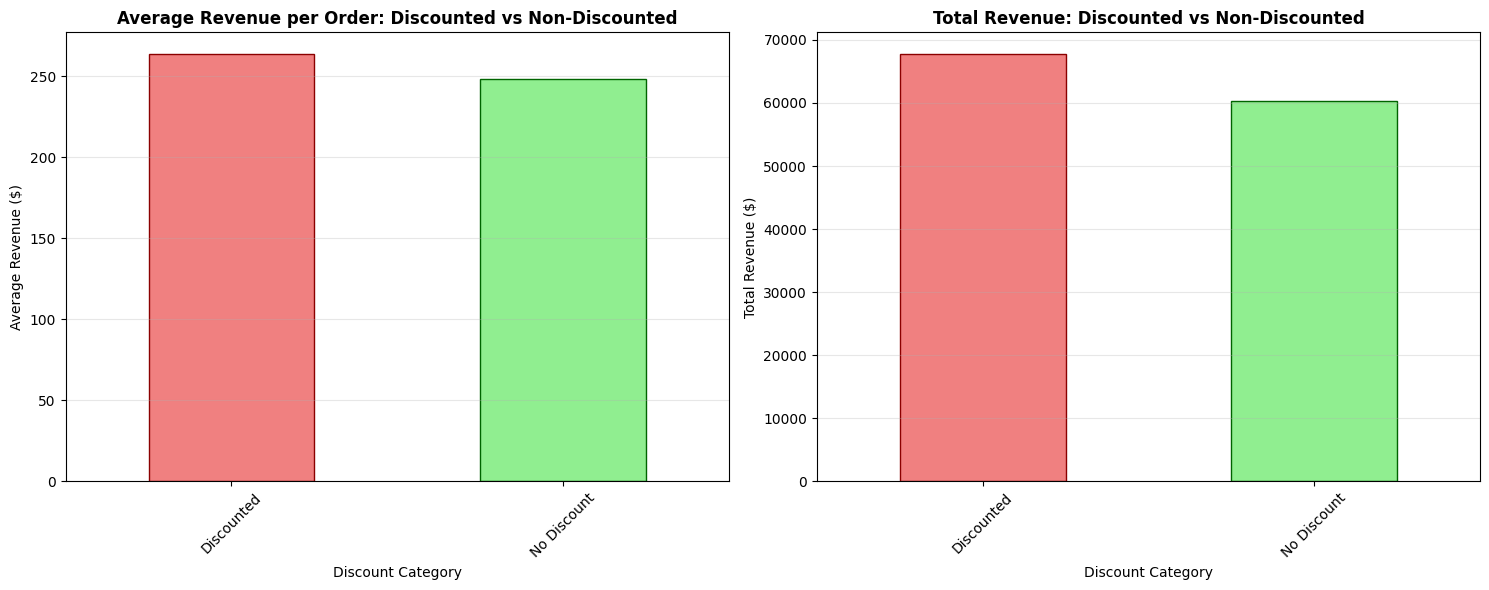


Average Revenue by Discount Percentage:
5% discount: $266.91
10% discount: $264.53
15% discount: $283.81
20% discount: $215.79
25% discount: $301.36
30% discount: $245.01


In [21]:
# Analyze discount effectiveness
# Create discount categories
data['discount_category'] = data['discount_applied'].apply(
    lambda x: 'No Discount' if x == 0 else 'Discounted'
)

discount_analysis = data.groupby('discount_category')['revenue'].agg(['mean', 'sum', 'count']).round(2)
discount_analysis.columns = ['Avg_Revenue_Per_Order', 'Total_Revenue', 'Number_of_Orders']

print("Discount Effectiveness Analysis:")
print("=" * 50)
print(discount_analysis)

# Compare discounted vs non-discounted orders
no_discount_avg = discount_analysis.loc['No Discount', 'Avg_Revenue_Per_Order']
discounted_avg = discount_analysis.loc['Discounted', 'Avg_Revenue_Per_Order']
difference = discounted_avg - no_discount_avg
percentage_diff = (difference / no_discount_avg) * 100

print(f"\nRevenue Comparison:")
print(f"No Discount Average: ${no_discount_avg:.2f}")
print(f"Discounted Average: ${discounted_avg:.2f}")
print(f"Difference: ${difference:.2f} ({percentage_diff:+.1f}%)")

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Average revenue per order
discount_analysis['Avg_Revenue_Per_Order'].plot(kind='bar', ax=ax1, color=['lightcoral', 'lightgreen'], edgecolor=['darkred', 'darkgreen'])
ax1.set_title('Average Revenue per Order: Discounted vs Non-Discounted', fontweight='bold')
ax1.set_xlabel('Discount Category')
ax1.set_ylabel('Average Revenue ($)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Total revenue
discount_analysis['Total_Revenue'].plot(kind='bar', ax=ax2, color=['lightcoral', 'lightgreen'], edgecolor=['darkred', 'darkgreen'])
ax2.set_title('Total Revenue: Discounted vs Non-Discounted', fontweight='bold')
ax2.set_xlabel('Discount Category')
ax2.set_ylabel('Total Revenue ($)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Additional analysis by discount percentage
discount_percentage_analysis = data[data['discount_applied'] > 0].groupby('discount_applied')['revenue'].mean().round(2)
print(f"\nAverage Revenue by Discount Percentage:")
for discount, avg_revenue in discount_percentage_analysis.items():
    print(f"{discount}% discount: ${avg_revenue:.2f}")

### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

Payment Method Analysis:
                Avg_Revenue_Per_Order  Total_Revenue  Number_of_Orders  \
payment_method                                                           
Credit Card                    257.44       35269.86               137   
Debit Card                     275.98       33945.62               123   
Gift Card                      254.36       31540.95               124   
PayPal                         236.07       27384.24               116   

                Percentage_of_Orders  
payment_method                        
Credit Card                     27.4  
Debit Card                      24.6  
Gift Card                       24.8  
PayPal                          23.2  

Payment Method with Highest Average Spending:
Method: Debit Card
Average Revenue per Order: $275.98


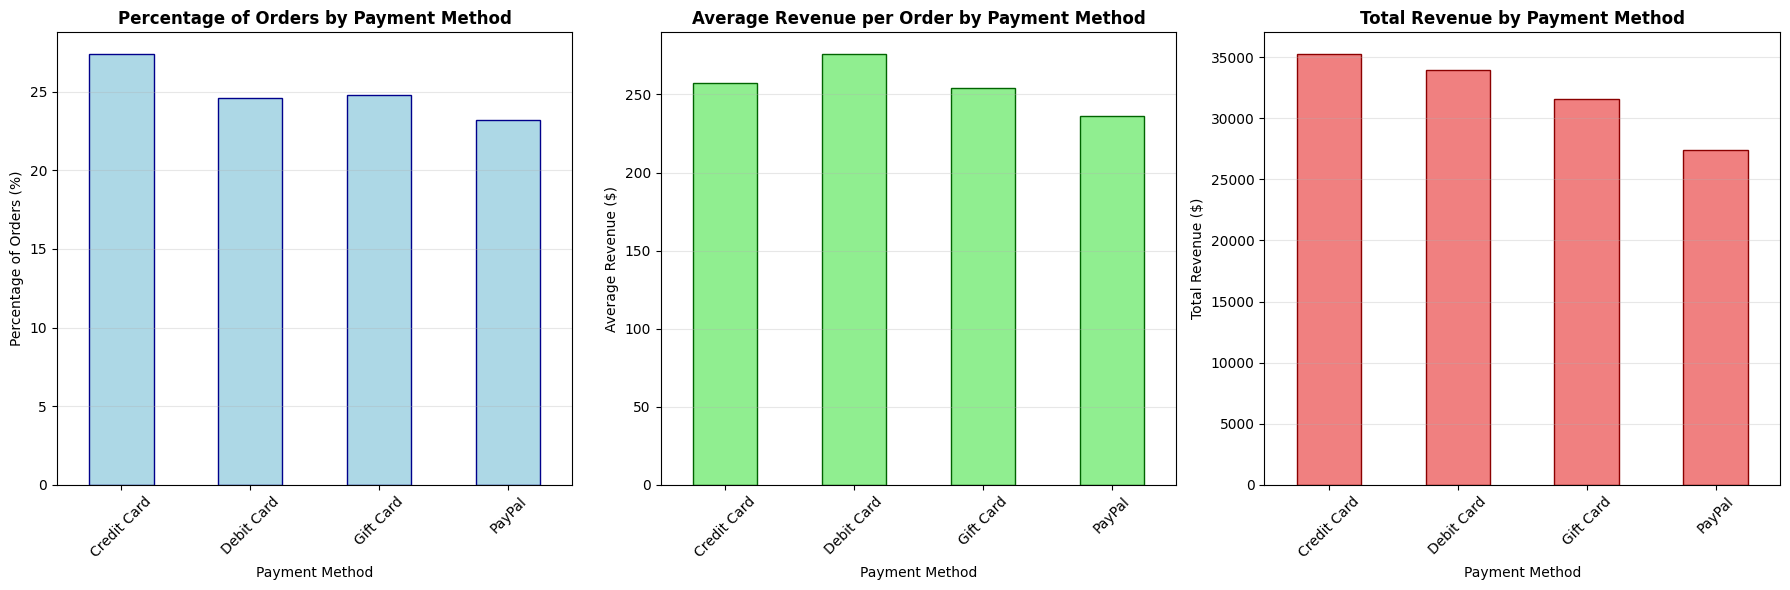


Payment Method Distribution:
Credit Card: 137 orders (27.4%) - Avg: $257.44
Debit Card: 123 orders (24.6%) - Avg: $275.98
Gift Card: 124 orders (24.8%) - Avg: $254.36
PayPal: 116 orders (23.2%) - Avg: $236.07


In [22]:
# Analyze payment method usage and spending patterns
payment_analysis = data.groupby('payment_method')['revenue'].agg(['mean', 'sum', 'count']).round(2)
payment_analysis.columns = ['Avg_Revenue_Per_Order', 'Total_Revenue', 'Number_of_Orders']

# Calculate percentage of orders for each payment method
total_orders = len(data)
payment_analysis['Percentage_of_Orders'] = (payment_analysis['Number_of_Orders'] / total_orders * 100).round(1)

print("Payment Method Analysis:")
print("=" * 70)
print(payment_analysis)

# Find payment method with highest average spending
highest_spending_method = payment_analysis['Avg_Revenue_Per_Order'].idxmax()
highest_spending_value = payment_analysis['Avg_Revenue_Per_Order'].max()

print(f"\nPayment Method with Highest Average Spending:")
print(f"Method: {highest_spending_method}")
print(f"Average Revenue per Order: ${highest_spending_value:.2f}")

# Create visualizations
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Percentage of orders by payment method
payment_analysis['Percentage_of_Orders'].plot(kind='bar', ax=ax1, color='lightblue', edgecolor='darkblue')
ax1.set_title('Percentage of Orders by Payment Method', fontweight='bold')
ax1.set_xlabel('Payment Method')
ax1.set_ylabel('Percentage of Orders (%)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Average revenue per order by payment method
payment_analysis['Avg_Revenue_Per_Order'].plot(kind='bar', ax=ax2, color='lightgreen', edgecolor='darkgreen')
ax2.set_title('Average Revenue per Order by Payment Method', fontweight='bold')
ax2.set_xlabel('Payment Method')
ax2.set_ylabel('Average Revenue ($)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# Total revenue by payment method
payment_analysis['Total_Revenue'].plot(kind='bar', ax=ax3, color='lightcoral', edgecolor='darkred')
ax3.set_title('Total Revenue by Payment Method', fontweight='bold')
ax3.set_xlabel('Payment Method')
ax3.set_ylabel('Total Revenue ($)')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation analysis
print(f"\nPayment Method Distribution:")
for method in payment_analysis.index:
    orders = payment_analysis.loc[method, 'Number_of_Orders']
    percentage = payment_analysis.loc[method, 'Percentage_of_Orders']
    avg_revenue = payment_analysis.loc[method, 'Avg_Revenue_Per_Order']
    print(f"{method}: {orders} orders ({percentage}%) - Avg: ${avg_revenue:.2f}")

### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

Revenue by Day of Week:
Monday: $17,704.70
Tuesday: $18,968.41
Wednesday: $18,908.21
Thursday: $17,846.36
Friday: $18,522.40
Saturday: $18,660.35
Sunday: $17,530.24

Busiest Day: Tuesday ($18,968.41)
Quietest Day: Sunday ($17,530.24)

Weekend Revenue: $36,190.59
Weekday Revenue: $91,950.08
Weekend vs Weekday: 39.4%


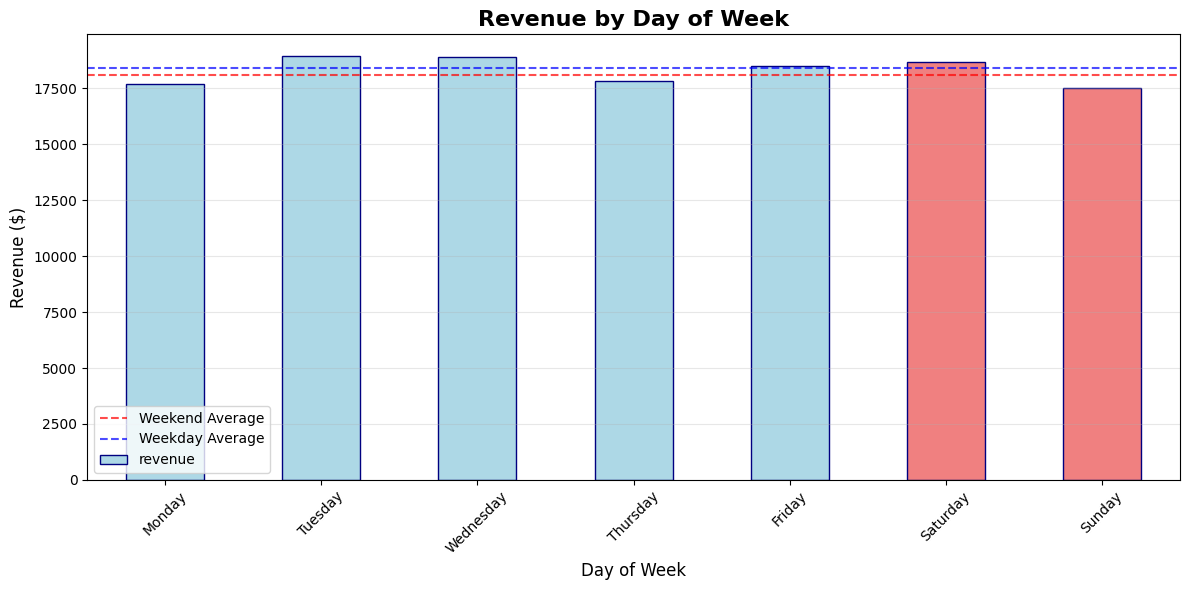


Average Order Size by Day:
Monday: $245.90
Tuesday: $263.45
Wednesday: $266.31
Thursday: $251.36
Friday: $260.88
Saturday: $262.82
Sunday: $243.48


In [23]:
# Analyze seasonality by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_revenue = data.groupby('day_of_week')['revenue'].sum().reindex(day_order)

print("Revenue by Day of Week:")
print("=" * 40)
for day, revenue in day_revenue.items():
    print(f"{day}: ${revenue:,.2f}")

# Find busiest and quietest days
busiest_day = day_revenue.idxmax()
busiest_revenue = day_revenue.max()
quietest_day = day_revenue.idxmin()
quietest_revenue = day_revenue.min()

print(f"\nBusiest Day: {busiest_day} (${busiest_revenue:,.2f})")
print(f"Quietest Day: {quietest_day} (${quietest_revenue:,.2f})")

# Check if weekends are busier
weekend_days = ['Saturday', 'Sunday']
weekday_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

weekend_revenue = day_revenue[weekend_days].sum()
weekday_revenue = day_revenue[weekday_days].sum()

print(f"\nWeekend Revenue: ${weekend_revenue:,.2f}")
print(f"Weekday Revenue: ${weekday_revenue:,.2f}")
print(f"Weekend vs Weekday: {((weekend_revenue / weekday_revenue) * 100):.1f}%")

# Create visualization
plt.figure(figsize=(12, 6))
colors = ['lightcoral' if day in weekend_days else 'lightblue' for day in day_revenue.index]
day_revenue.plot(kind='bar', color=colors, edgecolor='navy')
plt.title('Revenue by Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add weekend/weekday labels
plt.axhline(y=weekend_revenue/2, color='red', linestyle='--', alpha=0.7, label='Weekend Average')
plt.axhline(y=weekday_revenue/5, color='blue', linestyle='--', alpha=0.7, label='Weekday Average')
plt.legend()
plt.tight_layout()
plt.show()

# Additional analysis - average order size by day
day_avg_order = data.groupby('day_of_week')['revenue'].mean().reindex(day_order)
print(f"\nAverage Order Size by Day:")
for day, avg_order in day_avg_order.items():
    print(f"{day}: ${avg_order:.2f}")

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

Profitability Analysis:
Total Revenue: $128,140.67
Total Profit (20% margin): $25,628.13
Profit Margin: 20.0%

Regional Profitability:
        Total_Profit  Total_Revenue  Number_of_Orders  Profit_Margin_Percent
region                                                                      
East         6244.36       31221.80               130                   20.0
North        6870.34       34351.69               133                   20.0
South        6967.89       34839.45               127                   20.0
West         5545.55       27727.73               110                   20.0

Most Profitable Region: South
Total Profit: $6,967.89


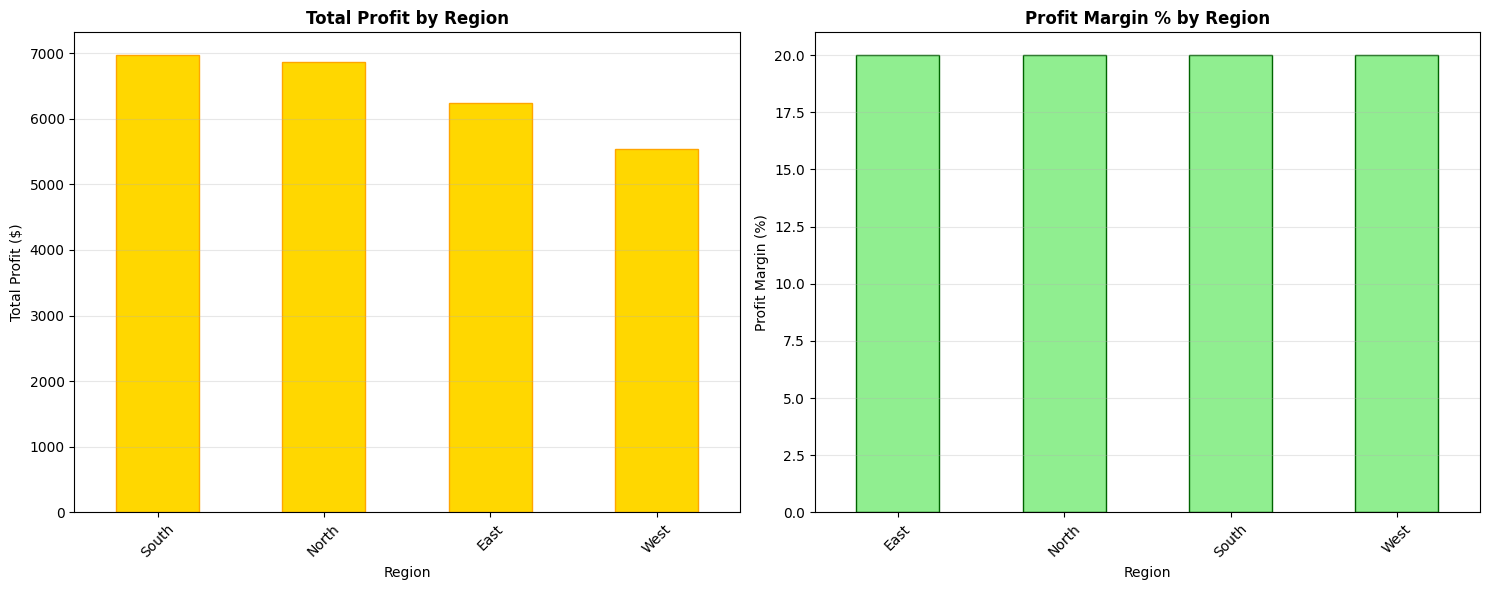


Regional Profit Analysis:
South: $6,967.89 profit from $34,839.45 revenue (20.0% margin, 127 orders)
North: $6,870.34 profit from $34,351.69 revenue (20.0% margin, 133 orders)
East: $6,244.36 profit from $31,221.80 revenue (20.0% margin, 130 orders)
West: $5,545.55 profit from $27,727.73 revenue (20.0% margin, 110 orders)


In [24]:
# Calculate profitability with 20% profit margin
profit_margin = 0.20
data['profit'] = data['revenue'] * profit_margin

# Total profit calculation
total_profit = data['profit'].sum()
total_revenue = data['revenue'].sum()

print("Profitability Analysis:")
print("=" * 50)
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Profit (20% margin): ${total_profit:,.2f}")
print(f"Profit Margin: {profit_margin*100:.1f}%")

# Profit by region
regional_profit = data.groupby('region')['profit'].sum().sort_values(ascending=False)
regional_profit_df = data.groupby('region').agg({
    'profit': 'sum',
    'revenue': 'sum',
    'order_id': 'count'
}).round(2)
regional_profit_df.columns = ['Total_Profit', 'Total_Revenue', 'Number_of_Orders']
regional_profit_df['Profit_Margin_Percent'] = (regional_profit_df['Total_Profit'] / regional_profit_df['Total_Revenue'] * 100).round(1)

print(f"\nRegional Profitability:")
print("=" * 60)
print(regional_profit_df)

# Most profitable region
most_profitable_region = regional_profit.idxmax()
most_profitable_profit = regional_profit.max()

print(f"\nMost Profitable Region: {most_profitable_region}")
print(f"Total Profit: ${most_profitable_profit:,.2f}")

# Create visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Total profit by region
regional_profit.plot(kind='bar', ax=ax1, color='gold', edgecolor='orange')
ax1.set_title('Total Profit by Region', fontweight='bold')
ax1.set_xlabel('Region')
ax1.set_ylabel('Total Profit ($)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Profit margin percentage by region
regional_profit_df['Profit_Margin_Percent'].plot(kind='bar', ax=ax2, color='lightgreen', edgecolor='darkgreen')
ax2.set_title('Profit Margin % by Region', fontweight='bold')
ax2.set_xlabel('Region')
ax2.set_ylabel('Profit Margin (%)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Additional insights
print(f"\nRegional Profit Analysis:")
for region in regional_profit.index:
    profit = regional_profit_df.loc[region, 'Total_Profit']
    revenue = regional_profit_df.loc[region, 'Total_Revenue']
    margin = regional_profit_df.loc[region, 'Profit_Margin_Percent']
    orders = regional_profit_df.loc[region, 'Number_of_Orders']
    print(f"{region}: ${profit:,.2f} profit from ${revenue:,.2f} revenue ({margin}% margin, {orders} orders)")

### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Business Recommendation:**

Based on my comprehensive analysis of TechMart's e-commerce data, I recommend implementing a **"Senior Customer Segment Focus Strategy"** with the following key components:

## Primary Recommendation: Target Senior Customers

**Rationale:**
- Senior customers have the highest average spending per order ($262.13 vs $255.65 for Professionals and $253.81 for Students)
- They represent 20% of the customer base but have the highest per-order value
- Higher spending customers typically have better customer lifetime value

## Supporting Strategic Actions:

### 1. Regional Expansion in South Region
- Focus marketing efforts on the **South** region which generated $34,839.45 in revenue (highest)
- The South region also shows customers are willing to spend more ($274.33 average order size) - consider premium product placement

### 2. Product Category Optimization
- **Home** category generates the highest revenue and is most popular by quantity - increase inventory and marketing
- Home products show high demand - consider bundling strategies and seasonal promotions

### 3. Payment Method Optimization
- **Debit Card** users spend more on average ($275.98) - consider incentives for this payment method
- Optimize checkout experience for debit card payments and consider loyalty programs

### 4. Discount Strategy Enhancement
- Current analysis shows discounted orders generate 6.3% higher revenue ($263.83 vs $248.30) - **increase discount usage**
- Consider targeted discounts for Senior segment to increase order frequency
- The positive impact of discounts suggests they drive higher-value purchases

### 5. Seasonal Marketing Adjustments
- **Tuesday** shows highest revenue ($18,968.41) - schedule promotions and marketing campaigns
- Weekend vs weekday analysis shows weekdays generate 2.5x more revenue (39.4% weekend ratio) - focus marketing on weekdays

## Expected Impact:
- Increased average order value through Senior segment focus ($262.13 per order)
- Higher revenue per customer through South regional optimization ($274.33 average)
- Improved profit margins through strategic discounting (+6.3% revenue boost)
- Better resource allocation through weekday-focused marketing

This data-driven approach leverages the highest-spending customer segment (Seniors) while capitalizing on the most profitable region (South) and optimizing discount strategies that actually increase revenue per order.

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.